In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv("csv/gameandgrade.csv")

In [3]:
df.head()

,Sex,School Code,Playing Years,Playing Often,Playing Hours,Playing Games,Parent Revenue,Father Education,Mother Education,Grade
0,0,1,1,2,1,1,4,4,5,77.50
1,1,1,1,3,1,1,1,3,3,83.00
2,0,1,0,0,0,0,1,3,3,80.00
3,0,1,3,5,1,1,2,2,3,45.00
4,1,1,1,1,2,1,1,3,4,85.00


In [4]:
#Check for duplicates
df.duplicated().sum()

np.int64(16)

In [5]:
#Clear duplicates
df = df[df.duplicated()== False]

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
# Convert to numeric to make 92..00 a NaN value
df["Grade"] = pd.to_numeric(df["Grade"], errors="coerce")

In [8]:
df.describe()

,Sex,School Code,Playing Years,Playing Often,Playing Hours,Playing Games,Parent Revenue,Father Education,Mother Education,Grade
count,754.000000,754.000000,754.000000,754.000000,754.000000,754.000000,754.000000,754.000000,754.000000,753.000000
mean,0.509284,4.885942,1.618037,2.290451,1.519894,0.721485,1.867374,3.700265,3.385942,77.134834
std,0.500246,2.993173,1.402897,1.915683,1.334098,0.451516,1.049086,1.168568,1.165399,16.415164
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000
25%,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,2.000000,65.000000
50%,1.000000,4.000000,1.000000,2.000000,1.000000,1.000000,2.000000,4.000000,3.000000,80.000000
75%,1.000000,8.000000,3.000000,4.000000,2.000000,1.000000,3.000000,4.000000,4.000000,90.000000
max,1.000000,11.000000,4.000000,5.000000,5.000000,2.000000,4.000000,6.000000,6.000000,100.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 754 entries, 0 to 769
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Sex               754 non-null    int64  
 1   School Code       754 non-null    int64  
 2   Playing Years     754 non-null    int64  
 3   Playing Often     754 non-null    int64  
 4   Playing Hours     754 non-null    int64  
 5   Playing Games     754 non-null    int64  
 6   Parent Revenue    754 non-null    int64  
 7   Father Education  754 non-null    int64  
 8   Mother Education  754 non-null    int64  
 9   Grade             753 non-null    float64
dtypes: float64(1), int64(9)
memory usage: 64.8 KB


In [10]:
# Check for null values, it will show 1 in Grade column due to 92..00 being converted to NaN
df.isnull().sum()

Sex                 0
School Code         0
Playing Years       0
Playing Often       0
Playing Hours       0
Playing Games       0
Parent Revenue      0
Father Education    0
Mother Education    0
Grade               1
dtype: int64

In [11]:
# Clear null values
df.dropna(inplace=True)

In [12]:
df.isnull().sum()

Sex                 0
School Code         0
Playing Years       0
Playing Often       0
Playing Hours       0
Playing Games       0
Parent Revenue      0
Father Education    0
Mother Education    0
Grade               0
dtype: int64

In [13]:
X = df[["Playing Years", "Playing Often", "Playing Hours", "Playing Games","Parent Revenue", "Father Education","Mother Education"]]
Y = df[["Grade"]]

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [15]:
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
})

print(f"Intercept (b): {model.intercept_[0]:.2f}")
print("\nFeature Coefficients:")
print(coefficients)

Intercept (b): 62.36

Feature Coefficients:
            Feature  Coefficient
0     Playing Years     0.580770
1     Playing Often     1.888650
2     Playing Hours    -0.343090
3     Playing Games   -10.525991
4    Parent Revenue    -0.779165
5  Father Education     2.210562
6  Mother Education     3.246068


In [16]:
Y_pred = model.predict(X_test)

In [17]:
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f"\nMean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Squared Error (MSE): 219.52
R² Score: 0.26


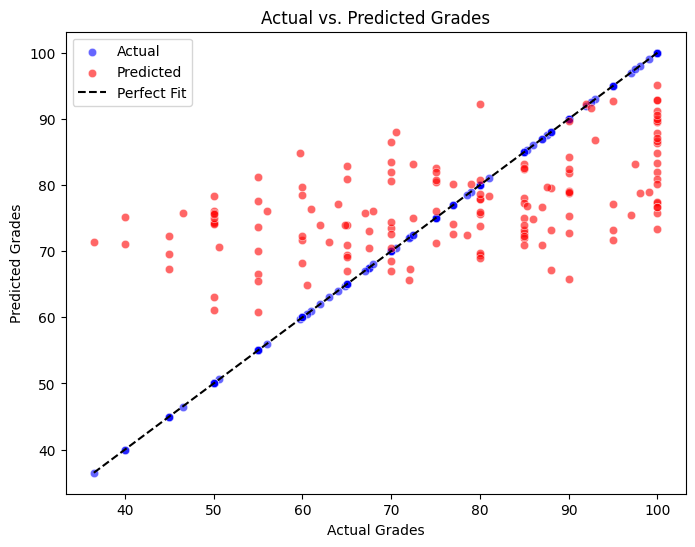

In [18]:
# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=Y_test.values.flatten(), y=Y_test.values.flatten(), color="blue", label="Actual", alpha=0.6)
sns.scatterplot(x=Y_test.values.flatten(), y=Y_pred.flatten(), color="red", label="Predicted", alpha=0.6)

# Reference line
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color="black", linestyle="--", label="Perfect Fit")

plt.xlabel("Actual Grades")
plt.ylabel("Predicted Grades")
plt.title("Actual vs. Predicted Grades")
plt.legend()
plt.show()

In [19]:
# Sorted coefficients
coefficients = coefficients.sort_values(by="Coefficient", ascending=False)
print("\nSorted Feature Coefficients:")
print(coefficients)


Sorted Feature Coefficients:
            Feature  Coefficient
6  Mother Education     3.246068
5  Father Education     2.210562
1     Playing Often     1.888650
0     Playing Years     0.580770
2     Playing Hours    -0.343090
4    Parent Revenue    -0.779165
3     Playing Games   -10.525991


In [20]:
r2_train = r2_score(Y_train, model.predict(X_train))
r2_test = r2_score(Y_test, Y_pred)


print(f"\nR² Score on Training Data: {r2_train:.4f}")
print(f"R² Score on Test Data: {r2_test:.4f}")


R² Score on Training Data: 0.1552
R² Score on Test Data: 0.2557
